# 📊 Exploratory Data Analysis (EDA) of a Customer Purchasing Behavior Analysis in a U.S. Online Clothing Store
--------

## Objective
The objective of this analysis is to explore customer purchasing behavior in an online clothing store operating in the United States, identifying patterns related to demographics, purchasing frequency, product preferences, and the impact of discounts and subscriptions on spending.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df= pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [13]:
df.shape

(3900, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [15]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## 📂 Dataset Overview

This dataset contains customer-level information from an online clothing store
based in the United States. It includes demographic data, product details,
purchase behavior, and promotional factors.

### Key dimensions:
- Customers demographics (age, gender, location)
- Product characteristics (category, size, color, season)
- Purchase behavior (purchase amount, frequency, previous purchases)
- Marketing strategies (discounts, promo codes, subscription status)

## 🧹 Data Cleaning and Preparation

In [18]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [19]:
df.isna().sum()

customer_id               0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amount_usd       0
location                  0
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

No missing values were found in the dataset, indicating good data qualityfor analysis.

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
categorical_cols = [
    'gender', 'category', 'size', 'color', 'season',
    'subscription_status', 'shipping_type',
    'discount_applied', 'promo_code_used',
    'payment_method', 'frequency_of_purchases'
]

df[categorical_cols] = df[categorical_cols].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customer_id             3900 non-null   int64   
 1   age                     3900 non-null   int64   
 2   gender                  3900 non-null   category
 3   item_purchased          3900 non-null   object  
 4   category                3900 non-null   category
 5   purchase_amount_usd     3900 non-null   int64   
 6   location                3900 non-null   object  
 7   size                    3900 non-null   category
 8   color                   3900 non-null   category
 9   season                  3900 non-null   category
 10  review_rating           3900 non-null   float64 
 11  subscription_status     3900 non-null   category
 12  shipping_type           3900 non-null   category
 13  discount_applied        3900 non-null   category
 14  promo_code_used         

---------------
## 📊 Business Questions & Analysis

### Which age range generates the highest purchases?

C:\Users\Jhoanny\AppData\Local\Temp\ipykernel_4876\192172885.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('age_group')['purchase_amount_usd'].sum().reset_index()


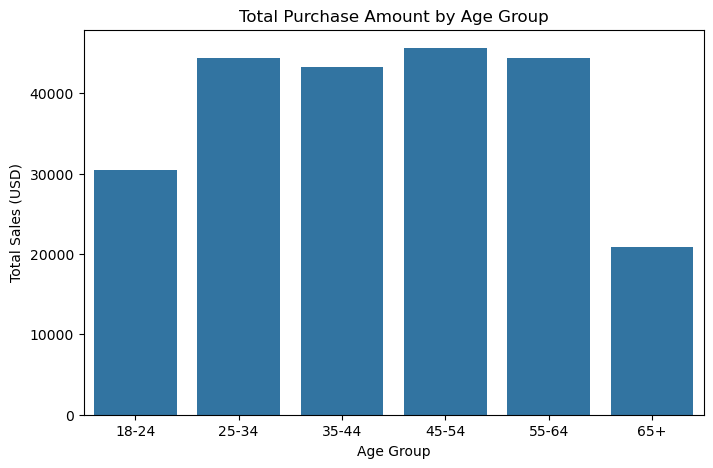

In [32]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_sales = df.groupby('age_group')['purchase_amount_usd'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='purchase_amount_usd', data=age_sales)
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales (USD)')
plt.show()

Customers between the 25–34 and 45–54 age ranges generate the highest total sales, suggesting that core revenue comes from young to mid-age adults.

### Are there spending differences between genders?

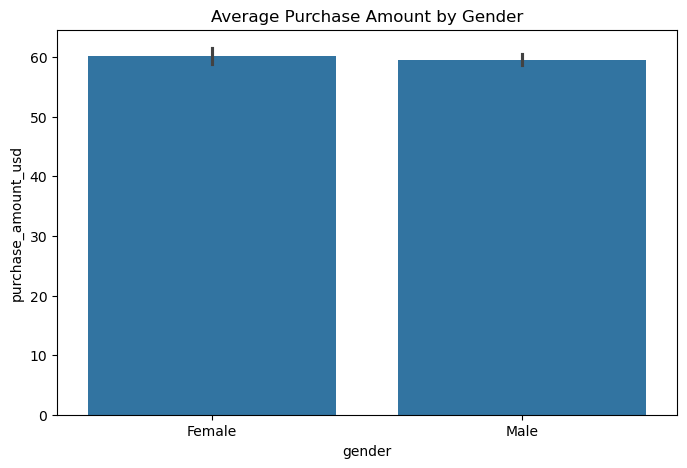

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='purchase_amount_usd', data=df, estimator=np.mean)
plt.title('Average Purchase Amount by Gender')
plt.show()

Average purchase amounts show slight variation across genders, indicating similar spending behavior with no extreme imbalance.

### Which U.S. states generate the highest sales?

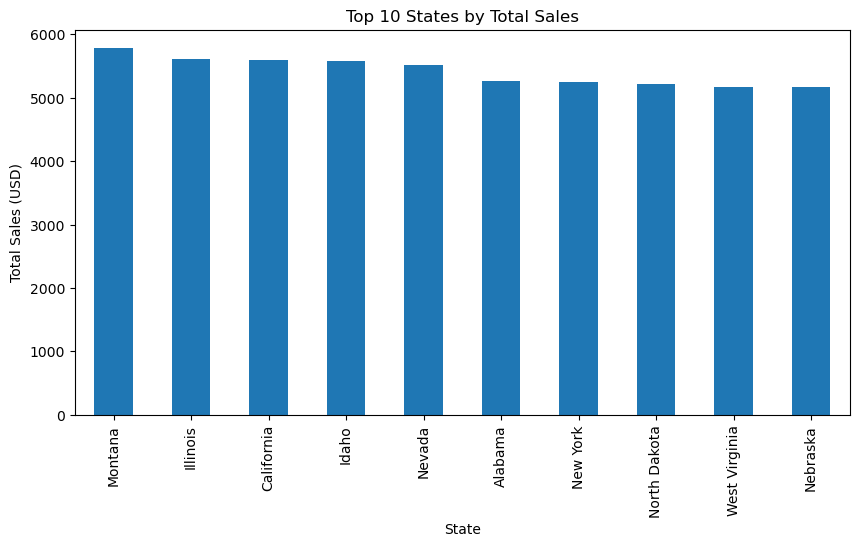

In [34]:
top_states = (
    df.groupby('location')['purchase_amount_usd']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_states.plot(kind='bar')
plt.title('Top 10 States by Total Sales')
plt.xlabel('State')
plt.ylabel('Total Sales (USD)')
plt.show()

Sales are concentrated in a small number of states, being Montana as the top state, highlighting key regional markets that could benefit from targeted marketing strategies.

### Which product categories sell the most?

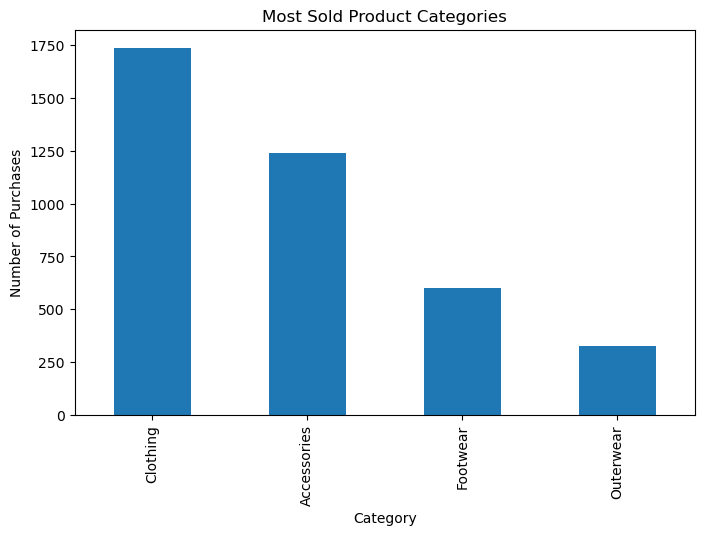

In [43]:
category_sales = df['category'].value_counts()

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title('Most Sold Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

Clothing dominate total sales, indicating strong customer preferences that can guide inventory planning.

### Which sizes are the most popular?

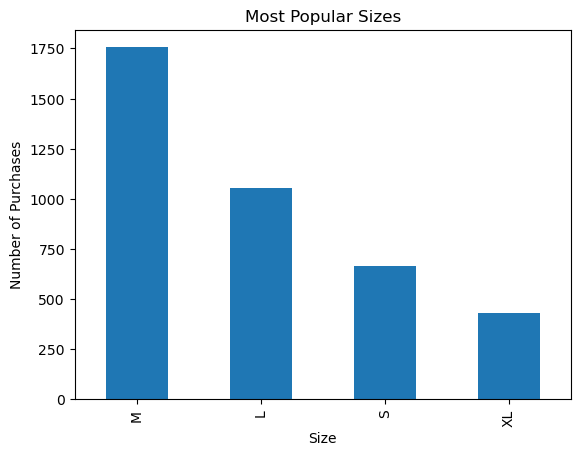

In [38]:
df['size'].value_counts().plot(kind='bar')
plt.title('Most Popular Sizes')
plt.xlabel('Size')
plt.ylabel('Number of Purchases')
plt.show()

Medium and Large sizes are the most frequently purchased, suggesting opportunities to optimizestock assortment.

### Which season generates the highest number of purchases?

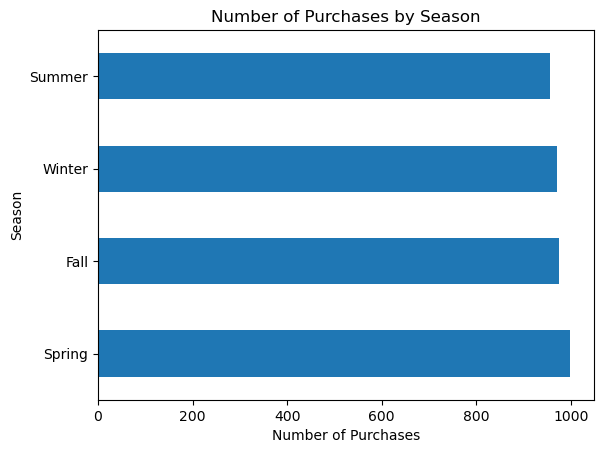

In [55]:
df['season'].value_counts().plot(kind='barh')
plt.title('Number of Purchases by Season')
plt.xlabel('Number of Purchases')
plt.ylabel('Season')
plt.show()

Purchase volume is relatively consistent across seasons. Spring shows a slightly
higher number of purchases; however, the differences between seasons are minimal,
indicating stable demand throughout the year.

### Does the average purchase amount vary by season?

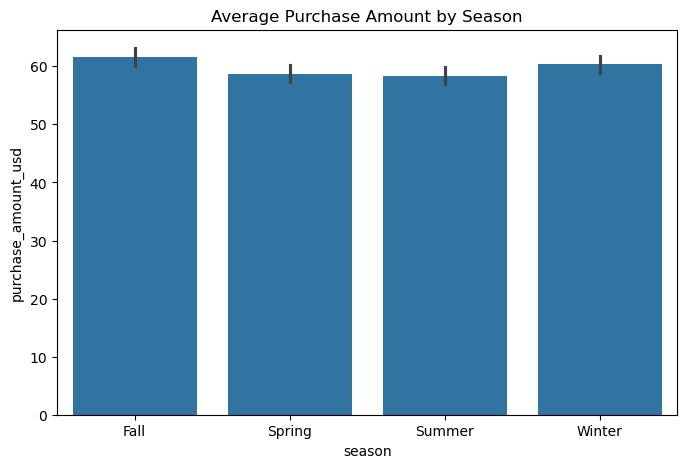

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='purchase_amount_usd', data=df, estimator=np.mean)
plt.title('Average Purchase Amount by Season')
plt.show()

Average purchase amounts are slightly higher during Fall and Winter compared to
Spring and Summer; however, the differences are marginal, suggesting seasonality
has a limited impact on spending per purchase.

### Do discounts increase the purchase amount?

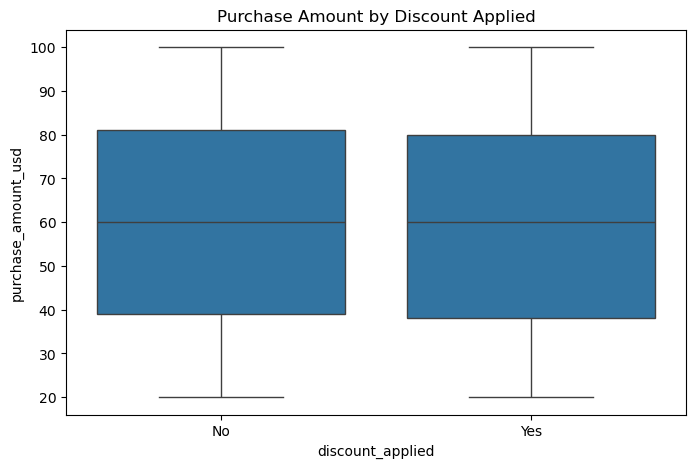

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='discount_applied', y='purchase_amount_usd', data=df)
plt.title('Purchase Amount by Discount Applied')
plt.show()

There is no significant difference in purchase amounts between transactions with and without discounts. 
Spending remains within a similar range, suggesting that discounts do not meaningfully increase purchase value.

### Is the use of promo codes associated with higher spending?

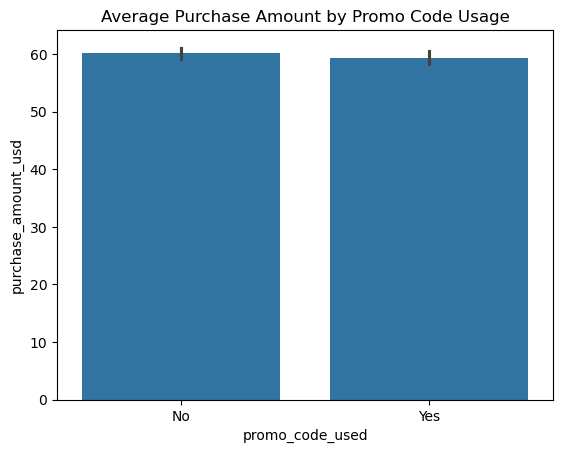

In [44]:
sns.barplot(
    x='promo_code_used',
    y='purchase_amount_usd',
    data=df,
    estimator=np.mean
)
plt.title('Average Purchase Amount by Promo Code Usage')
plt.show()

The use of promo codes does not appear to be associated with higher spending.
Average purchase amounts remain nearly identical regardless of promo code usage.

### Do subscribed customers spend more?

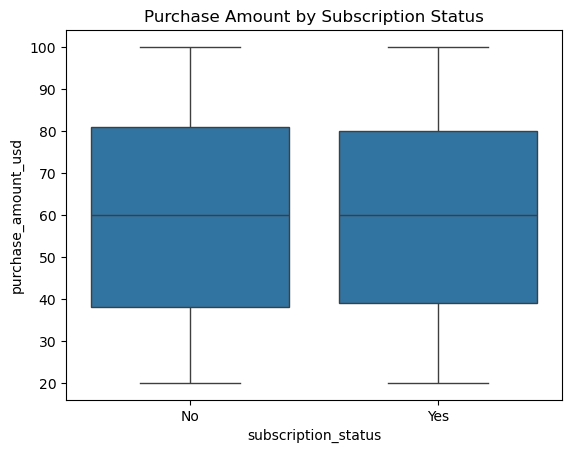

In [45]:
sns.boxplot(
    x='subscription_status',
    y='purchase_amount_usd',
    data=df
)
plt.title('Purchase Amount by Subscription Status')
plt.show()

Subscription status does not show a meaningful impact on purchase amount. Both
subscribed and non-subscribed customers display similar spending ranges.

### Is there a relationship between previous purchases and purchase frequency?

<Axes: xlabel='previous_purchases', ylabel='frequency_of_purchases'>

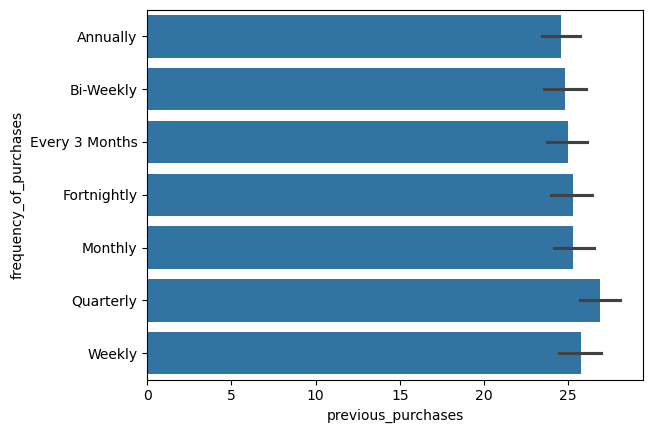

In [56]:
sns.barplot(
    x='previous_purchases',
    y='frequency_of_purchases',
    data=df,
    estimator=np.mean
)

Purchase frequency tends to increase with the number of previous purchases,
with a noticeable uptick in quarterly purchases compared to other periods.
This suggests that repeat customers are more likely to buy more frequently,
especially on a quarterly basis.

### Do higher review ratings lead to higher spending?

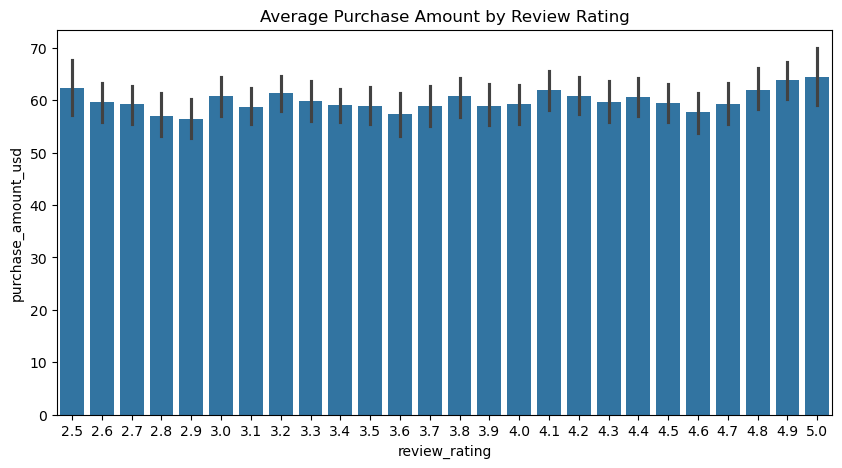

In [51]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x='review_rating',
    y='purchase_amount_usd',
    data=df,
)
plt.title('Average Purchase Amount by Review Rating')
plt.show()


Purchase amount remains relatively consistent across review ratings, indicating
that customer satisfaction does not strongly influence spending per transaction.

--------------

## 💡 Business Recommendations

- Focus marketing efforts on high-performing age groups (25–54) and key states.
- Prioritize inventory for top-selling categories and sizes.
- Monitor seasonal trends, but note that purchase volume and spending are relatively stable throughout the year. Seasonal promotions can still be tested, but demand appears consistent across seasons.
- Evaluate the subscription program for other benefits, such as customer retention or engagement, as it does not currently show a significant impact on purchase amounts.
- Continue offering discounts and promo codes as marketing tools, but note that they do not significantly increase purchase amounts in this dataset.

## ⚠️ Limitations

Some variables, such as discounts, promo codes, and subscription status, show
limited impact on purchase amount. This suggests that other factors not captured
in the dataset may play a stronger role in driving customer spending.